## Préambule : régression linéaire, régression ridge et LASSO

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np

from RegressionLineaire import PlugInLineaire, load_usps, show_usps
from utils import filter_values
from cross_validation import validation_croisee

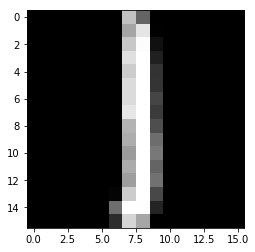

In [3]:
class1 = 0
class2 = 1
all_train_x,all_train_y = load_usps('USPS/USPS_train.txt')
train_x, train_y = filter_values(all_train_x, all_train_y, class1, class2)
all_test_x, all_test_y = load_usps('USPS/USPS_test.txt')
test_x, test_y = filter_values(all_test_x, all_test_y, class1, class2)
show_usps(train_x[0])

In [4]:
def evaluate_model(model, null_seuil=0.01):
    print('Model : ', model['name'])
    model['clf'].fit(train_x,train_y)
    score = model['clf'].score(test_x, test_y)
    print("Precision of classifier ", score)
    
    print("Weights of classifier")
    weights = model['clf'].w
    show_usps(weights[1:]) # skip w0
    
    print("Norm of weights: ")
    print(np.linalg.norm(weights))
    
    print("Number of non nulls: ")
    print((abs(weights) > null_seuil).sum())

### MSE
On commence par régression linéaire avec fonction de coût moindres carrées / MSE.

Model :  MSE
Precision of classifier  0.812199036918138
Weights of classifier


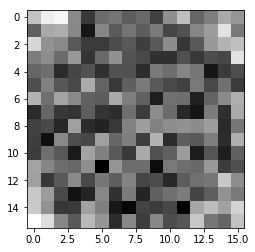

Norm of weights: 
4.874215862971292
Number of non nulls: 
249


In [26]:
from RegressionLineaire import mse, mse_g
mse_classifier = PlugInLineaire(loss=mse, loss_g=mse_g,eps=0.001)
evaluate_model({'name': 'MSE', 'clf': mse_classifier})

### Régularisation de Tikhonov : L2

In [34]:
# il faut faire varier dans experiments, logistic regression pour trouver le meilleur alpha
def L2(datax,datay,w,alpha):
    regularisation = (w ** 2).sum()
    return mse(datax, datay, w, alpha) + alpha * regularisation

def L2_g(datax,datay,w,alpha):
    regularisation_g = 2 * w#.sum()
    return mse_g(datax,datay,w,alpha) + alpha * regularisation_g

Model :  L2
Precision of classifier  0.8491171749598716
Weights of classifier


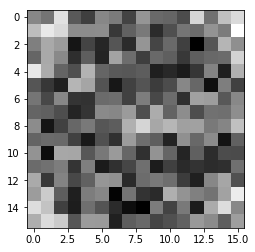

Norm of weights: 
5.228896492511616
Number of non nulls: 
254


In [16]:
L2_classifier = PlugInLineaire(loss=L2, loss_g=L2_g, eps=0.001)
evaluate_model({'name': 'L2', 'clf': L2_classifier})

### LASSO : L1

In [33]:
# il faut faire varier dans experiments, logistic regression pour trouver le meilleur alpha
def L1(datax,datay,w, alpha):
    regularisation = w.sum()
    return mse(datax, datay, w, alpha) + alpha * regularisation

def L1_g(datax,datay,w, alpha):
    regularisation_g = np.sign(w)
    return mse_g(datax,datay,w, alpha) + alpha * regularisation_g

Model :  L1
Precision of classifier  0.8523274478330658
Weights of classifier


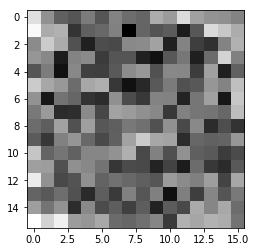

Norm of weights: 
5.0952062554176
Number of non nulls: 
251


In [17]:
L1_classifier = PlugInLineaire(loss=L1, loss_g=L1_g, eps=0.001)
evaluate_model({'name': 'L1', 'clf': L1_classifier})

### Let's search the best alpha

In [42]:
def grid_search(X,Y,loss,loss_g, alphas):
    result = np.zeros(len(alphas))
    for i,a in enumerate(alphas):
        model = PlugInLineaire(loss=loss, loss_g=loss_g, eps=0.001, alpha=a)
        result[i] = validation_croisee(X,Y, model, 10)
    return alphas[result.argmax()], result.max()

In [43]:
alphas = [0.1,0.3, 0.5, 0.8,1, 1.5, 2, 3]
# mse should give allways something similar, becouse it does not use alpha
#print("MSE : ", grid_search(train_x, train_y, mse, mse_g, alphas))
print("L2 : ",grid_search(train_x, train_y, L2, L2_g, alphas))
print("L1 : ",grid_search(train_x, train_y, L1, L1_g, alphas))

L2 :  (2, 1.0)
L1 :  (0.8, 0.9945392278953923)


TypeError: <lambda>() missing 1 required positional argument: '___'